In [4]:
import statsmodels.tsa.stattools as ts
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import numpy.random as rng

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


Text(0.5,1,'Test statistic = -1.87. Critical value at 1% = -3.44. \n Decision = accept - unit root (non stationary)')

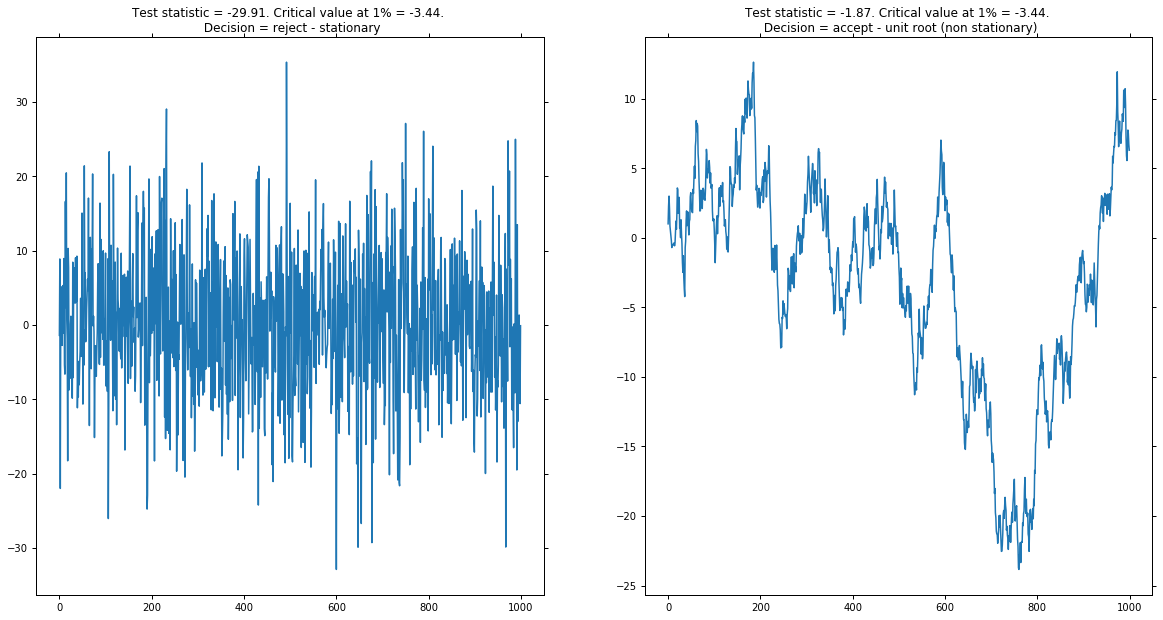

In [46]:
nObs = 1e3
x = rng.normal(0,10,nObs)
xNs = np.empty(nObs)
xNs[0] = 1.0
for i in range(1,int(nObs)):
    xNs[i] = 0.99*xNs[i-1] + rng.normal(0,1)

adf1 = ts.adfuller(x, 1)
adf2 = ts.adfuller(xNs, 1)
def adfSummary(adfTest):
    if np.abs(adfTest[0]) > np.abs(adfTest[4]["1%"]):
        decision = "reject - stationary"
    else:
        decision = "accept - unit root (non stationary)"
    summary = "Test statistic = {0:.2f}. Critical value at 1% = {1:.2f}. \n Decision = {2}".format(adfTest[0],adfTest[4]["1%"],decision)
    return summary

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(x)
plt.title(adfSummary(adf1))
plt.subplot(122)
plt.plot(xNs)
plt.title(adfSummary(adf2))